In [1]:
import pandas as pd
import numpy as np

In [181]:
from src.PortfolioIndicator import PortfolioIndicator
from src.PortfolioConstructor import PortfolioConstructor

In [2]:
data_directory = "data/"
file = "all_cryptocurrency_price_data.csv"

In [3]:
df = pd.read_csv(data_directory+file)
df.index = pd.to_datetime(df.iloc[:,0])
df = df.iloc[:,1:]

In [11]:
df.shape

(1400, 299)

In [17]:
missing_value_date = df.isna().apply(sum,axis=1)

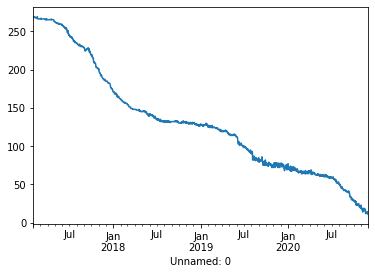

In [19]:
missing_value_date.plot()

In [40]:
sub_df = df[df.index > "2019-01-01"]
sub_df = sub_df.fillna(method="ffill")
complete_sub_df = sub_df.dropna(axis=1)

In [370]:
small_complete_df = complete_sub_df.iloc[:,list((complete_sub_df.iloc[0,:]<100))]

In [371]:
big_complete_df = complete_sub_df.iloc[:,list((complete_sub_df.iloc[0,:]>0.1))]

### Momentum Strategy Test

In [372]:
universe_df = big_complete_df

#### Calculate the Signal

In [407]:
momentum_period = 4
waiting_time = 2

In [408]:
complete_ret_sub_df = universe_df.pct_change(periods=momentum_period).shift(waiting_time).dropna()

In [409]:
complete_ret_sub_df_long = complete_ret_sub_df.stack()

In [410]:
index_df = complete_ret_sub_df_long.index.to_frame()
index_df.index = range(0,index_df.shape[0])
index_df["momentum"] = list(complete_ret_sub_df_long)
index_df.columns=["date","ticker","momentum"]

#### Create Portfolio Indicator

In [411]:
rebalance_date_series = list(complete_ret_sub_df.index)

In [412]:
portfolio_indicator = PortfolioIndicator()

In [413]:
portfolio_indicator = portfolio_indicator.create_indicator(index_df,"momentum",rebalance_date_series,5)

In [414]:
portfolio_indicator

,date,ticker,momentum_indicator
0,2019-01-08 00:00:00+00:00,BCD,2
1,2019-01-08 00:00:00+00:00,NAS,0
2,2019-01-08 00:00:00+00:00,BCH,0
3,2019-01-08 00:00:00+00:00,CTXC,4
4,2019-01-08 00:00:00+00:00,ONTGAS,0
...,...,...,...
63751,2020-11-30 00:00:00+00:00,MCO,0
63752,2020-11-30 00:00:00+00:00,ELF,2
63753,2020-11-30 00:00:00+00:00,DCR,3
63754,2020-11-30 00:00:00+00:00,BTC,3


### Calculate Portfolio Strategy Return

In [415]:
complete_sub_df_1 = universe_df.pct_change().dropna()
complete_sub_df_1_long = complete_sub_df_1.stack()

In [416]:
index_df = complete_sub_df_1_long.index.to_frame()
index_df["ret"] = complete_sub_df_1_long
index_df.index=range(0,index_df.shape[0])
index_df.columns = ["date","ticker","ret"]

In [417]:
merge_df = index_df.merge(portfolio_indicator,on=["date","ticker"])

In [418]:
portfolio_constructor = PortfolioConstructor(merge_df)

In [419]:
strategy_ret_df = portfolio_constructor.create_portfolio_series("momentum_indicator",equal_weight=True)

In [420]:
strategy_ret_df.describe()

momentum_indicator,0,1,2,3,4
count,693.000000,693.000000,693.000000,693.000000,693.000000
mean,0.003017,0.001213,0.002894,0.002659,0.002914
std,0.042496,0.040232,0.044485,0.041264,0.045227
min,-0.412499,-0.466707,-0.438980,-0.458587,-0.260439
25%,-0.013188,-0.015129,-0.014780,-0.014808,-0.018188
50%,0.004109,0.003089,0.005335,0.005135,0.003578
75%,0.022703,0.022026,0.021796,0.021253,0.023221
max,0.264519,0.157149,0.473821,0.190791,0.536750


In [421]:
strategy_cum_ret_df = (strategy_ret_df+1).cumprod()

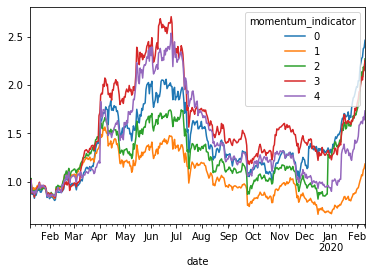

In [422]:
strategy_cum_ret_df.iloc[0:400,:].plot()

In [423]:
strategy_ret_df.mean()/strategy_ret_df.std()

momentum_indicator
0    0.070985
1    0.030153
2    0.065055
3    0.064430
4    0.064429
dtype: float64